In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
xls = pd.ExcelFile('C:\\Users\\Tanweer\\Downloads\\Case study Vindiata2.xlsx')
df1 = pd.read_excel(xls, 'Operations', )
df2 = pd.read_excel(xls, 'AC characteristics')
df3=df1.groupby('Aircraft Type').sum()
df3['totalhrs']=df3.sum(axis = 1, skipna = True) 
df3

,JAN,FEB,MARCH,APRIL,MAY,JUNE,JULY,AUG,SEPT,OCT,NOV,DEC,totalhrs
Aircraft Type,,,,,,,,,,,,,
A320,1240,1245,1230,1255,1205,1215,1230,1220,1270,1270,1245,1250,14875
A330,1820,1826,1808,1838,1778,1790,1808,1796,1856,1856,1826,1832,21834
ATR72,795,799,787,807,767,775,787,779,819,819,799,803,9536
B737,985,989,977,997,957,965,977,969,1009,1009,989,993,11816
B747,920,923,914,929,899,905,914,908,938,938,923,926,11037
Q400,790,794,782,802,762,770,782,774,814,814,794,798,9476


In [ ]:
df3.drop(['JAN', 'FEB', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEPT',
       'OCT', 'NOV', 'DEC'],axis=1,inplace=True)
df3.reset_index()

,Aircraft Type,totalhrs
0,A320,14875
1,A330,21834
2,ATR72,9536
3,B737,11816
4,B747,11037
5,Q400,9476


In [ ]:
df2=pd.merge(df2,df3,left_on='Aircraft Type',right_on='Aircraft Type')

In [ ]:
df2

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,totalhrs
0,A320,5000,800,150,5000,14875
1,A330,8000,900,250,7500,21834
2,B737,5000,800,150,5100,11816
3,B747,10000,900,350,12000,11037
4,Q400,1500,750,90,3500,9476
5,ATR72,1000,650,75,2750,9536


In [ ]:
df2['total_cost']=df2['Costs per flight hour']*df2['totalhrs']
df2['lwst_cost_per_seat']=(df2['total_cost']/((df2['totalhrs']*df2['Ave. Speed (km/h)'])*df2['Number of Seats']))

In [ ]:
df2

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,totalhrs,total_cost,lwst_cost_per_seat
0,A320,5000,800,150,5000,14875,74375000,0.041667
1,A330,8000,900,250,7500,21834,163755000,0.033333
2,B737,5000,800,150,5100,11816,60261600,0.042500
3,B747,10000,900,350,12000,11037,132444000,0.038095
4,Q400,1500,750,90,3500,9476,33166000,0.051852
5,ATR72,1000,650,75,2750,9536,26224000,0.056410


In [ ]:
Total_hours=df2['totalhrs'].sum()
Total_hours

78574

In [ ]:
#Which aircraft type  has the lowest cost per seat per km flown?

df2.loc[df2['lwst_cost_per_seat'].idxmin(),"Aircraft Type"]

'A330'

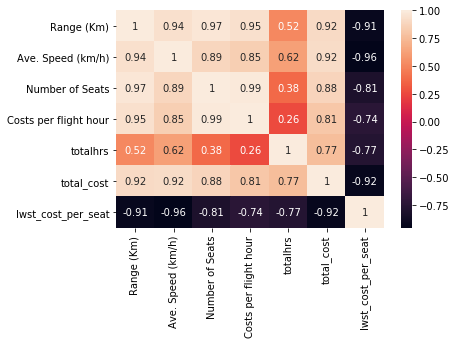

In [ ]:
sns.heatmap(df2.corr(),annot=True)

In [ ]:
#no. of flights of a particular type
df5 = pd.read_excel(xls, 'Operations', )
airc=df5['Aircraft Type'].value_counts()
airc

A330     6
A320     5
B737     4
Q400     4
ATR72    4
B747     3
Name: Aircraft Type, dtype: int64

In [ ]:
df6 = pd.read_excel(xls, 'City pairs')
df6=df6.sort_values(by=['Distance (km)'],ascending=False).reset_index().drop(['index'],axis=1)

In [ ]:
a_dictionary = {}
for i in range(len(df6["Distance (km)"])) :
    a_dictionary[str(df6.loc[i,"Origin City"]) +'-'+str(df6.loc[i,"Desitnation City"])]=df2.loc[(df2["Range (Km)"]>=df6.loc[i,"Distance (km)"]),"Aircraft Type"]
a_dictionary

{'BB-CC': 1    A330
 3    B747
 Name: Aircraft Type, dtype: object,
 'AA-BB': 0    A320
 1    A330
 2    B737
 3    B747
 Name: Aircraft Type, dtype: object,
 'AA-DD': 0     A320
 1     A330
 2     B737
 3     B747
 4     Q400
 5    ATR72
 Name: Aircraft Type, dtype: object,
 'CC-AA': 0     A320
 1     A330
 2     B737
 3     B747
 4     Q400
 5    ATR72
 Name: Aircraft Type, dtype: object}

In [ ]:
p1=pd.DataFrame.from_dict(a_dictionary, orient='index')

In [ ]:
df2

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,totalhrs,total_cost,lwst_cost_per_seat
0,A320,5000,800,150,5000,14875,74375000,0.041667
1,A330,8000,900,250,7500,21834,163755000,0.033333
2,B737,5000,800,150,5100,11816,60261600,0.042500
3,B747,10000,900,350,12000,11037,132444000,0.038095
4,Q400,1500,750,90,3500,9476,33166000,0.051852
5,ATR72,1000,650,75,2750,9536,26224000,0.056410


In [ ]:
df6

,Origin City,Desitnation City,Pass. Demand \n(per day),Distance (km)
0,BB,CC,450,6500
1,AA,BB,420,3000
2,AA,DD,300,1000
3,CC,AA,300,400


In [ ]:
p1

,1,3,0,2,4,5
BB-CC,A330,B747,NaN,NaN,NaN,NaN
AA-BB,A330,B747,A320,B737,NaN,NaN
AA-DD,A330,B747,A320,B737,Q400,ATR72
CC-AA,A330,B747,A320,B737,Q400,ATR72


In [ ]:
ls=[]
totallst=[]
for k in range(p1.shape[0]):
    for i in range(p1.shape[1]) :
        if pd.isna(p1.iloc[k,i]) == True :             
            continue
        p=((df6.loc[k,'Distance (km)']/df2.loc[p1.columns[i],'Ave. Speed (km/h)'])*df2.loc[p1.columns[i],'Costs per flight hour'])*math.ceil(df6.loc[k,'Pass. Demand \n(per day)']/df2.loc[p1.columns[i],'Number of Seats'])
        ls.append(p)                                                                                                                                           
    totallst.append(ls)
    ls=[]
rflights=pd.DataFrame(totallst,columns=['A330','B747','A320','B737','Q400','ATR72'])

In [ ]:
rflights

,A330,B747,A320,B737,Q400,ATR72
0,108333.333333,173333.333333,NaN,NaN,NaN,NaN
1,50000.000000,80000.000000,56250.0,57375.0,NaN,NaN
2,16666.666667,13333.333333,12500.0,12750.0,18666.666667,16923.076923
3,6666.666667,5333.333333,5000.0,5100.0,7466.666667,6769.230769


In [ ]:
rflights.min(axis=1)

0    108333.333333
1     50000.000000
2     12500.000000
3      5000.000000
dtype: float64

In [ ]:
'''
Which aircraft types are best suited for their operation?
so for path BB-CC : A330 
for path AA-BB: A330 
for path AA-DD: A320
for path CC-AA: A320
'''

'\nWhich aircraft types are best suited for their operation?\nso for path BB-CC : A330 \nfor path AA-BB: A330 \nfor path AA-DD: A320\nfor path CC-AA: A320\n'

In [ ]:
#So now if you want to know how many flights of a particular aircraft type will be required
#for BB-CC A330
print(math.ceil(df6.loc[0,'Pass. Demand \n(per day)']/df2.loc[1,'Number of Seats']))
#for AA-BB A330
print(math.ceil(df6.loc[1,'Pass. Demand \n(per day)']/df2.loc[1,'Number of Seats']))
#for AA-DD A320
print(math.ceil(df6.loc[2,'Pass. Demand \n(per day)']/df2.loc[0,'Number of Seats']))
#for CC-AA A320
print(math.ceil(df6.loc[3,'Pass. Demand \n(per day)']/df2.loc[0,'Number of Seats']))

2
2
2
2
